In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


##IMPORTING DATA



In [ ]:
from google.colab import files
upload =files.upload()


Saving bengaluru_house_data.csv to bengaluru_house_data (1).csv


In [ ]:
df=pd.read_csv('bengaluru_house_data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


Removing Unnecessary columns

In [ ]:
df1=df.drop(['area_type','availability','society'],axis='columns')
df1.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


Removing Null values 

In [ ]:
df1.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [ ]:
df1=df1.dropna()
df1


,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


##Filtering Data

Size column


In [ ]:
#splitting size value and grabing only integer part
li=[]
for value in df1['size']:
  text=value.split(' ')
  li.append(int(text[0]))
#making that list as column in dataframe and droping the extra size column
li1=np.array(li)
df1['bhk']=li1
df2=df1.drop('size',axis='columns')
df2

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...
13314,Green Glen Layout,1715,3.0,3.0,112.00,3
13315,Whitefield,3453,4.0,0.0,231.00,5
13317,Raja Rajeshwari Nagar,1141,2.0,1.0,60.00,2
13318,Padmanabhanagar,4689,4.0,1.0,488.00,4


Location

In [ ]:
#If the frequency is less than equals to 20, then we rename the society as ‘others’ .
lower_inx=df2['location'].value_counts()
lower_inx=lower_inx[lower_inx<=20]
df2['location']=df2['location'].apply(lambda x :'Others' if x in lower_inx else x)
len(df2['location'].unique())

139

total_sqft 

In [ ]:
total_sq=[]
for str_val in df2['total_sqft']:
  try:
    total_sq.append(float(str_val))# taking first value "1330.74" values in tota_sqft column
  except:
    try:
      spli=[]
      spli=str_val.split(' ')
      total_sq.append((float(spli[0])+float(spli[-1]))/2)#taking mean '3010 - 3410' of such values in total_sqft column
    except:
      total_sq.append(np.nan)# putting nan value for such '4125Perch' value in total_sqft column
#making new total_sqft as sqft_area column
li1=np.array(total_sq)
df2['sqft_area']=li1
df3=df2.drop('total_sqft',axis='columns')
df3.head()

,location,bath,balcony,price,bhk,sqft_area
0,Electronic City Phase II,2.0,1.0,39.07,2,1056.0
1,Others,5.0,3.0,120.00,4,2600.0
2,Uttarahalli,2.0,3.0,62.00,3,1440.0
3,Lingadheeranahalli,3.0,1.0,95.00,3,1521.0
4,Kothanur,2.0,1.0,51.00,2,1200.0


Sqft per bedroom 

In [ ]:
#calculating sqft_area/no_bedrooms
li2=np.array((df3.sqft_area)/(df3.bhk))
df3['sqft_per_bedroom']=li2
df3

,location,bath,balcony,price,bhk,sqft_area,sqft_per_bedroom
0,Electronic City Phase II,2.0,1.0,39.07,2,1056.0,528.000000
1,Others,5.0,3.0,120.00,4,2600.0,650.000000
2,Uttarahalli,2.0,3.0,62.00,3,1440.0,480.000000
3,Lingadheeranahalli,3.0,1.0,95.00,3,1521.0,507.000000
4,Kothanur,2.0,1.0,51.00,2,1200.0,600.000000
...,...,...,...,...,...,...,...
13314,Green Glen Layout,3.0,3.0,112.00,3,1715.0,571.666667
13315,Whitefield,4.0,0.0,231.00,5,3453.0,690.600000
13317,Raja Rajeshwari Nagar,2.0,1.0,60.00,2,1141.0,570.500000
13318,Padmanabhanagar,4.0,1.0,488.00,4,4689.0,1172.250000


Price per sqft

In [ ]:
#renaming price as price(inlakhs)
df3.rename(columns={'price':'price(inlakhs)'},inplace=True)
#calculating price_per_sqft
df3['price']=pd.to_numeric(df['price'])
df3['price_per_sqft']=df3['price']*100000/df3['sqft_per_bedroom']
df3

,location,bath,balcony,price(inlakhs),bhk,sqft_area,sqft_per_bedroom,price,price_per_sqft
0,Electronic City Phase II,2.0,1.0,39.07,2,1056.0,528.000000,39.07,7399.621212
1,Others,5.0,3.0,120.00,4,2600.0,650.000000,120.00,18461.538462
2,Uttarahalli,2.0,3.0,62.00,3,1440.0,480.000000,62.00,12916.666667
3,Lingadheeranahalli,3.0,1.0,95.00,3,1521.0,507.000000,95.00,18737.672584
4,Kothanur,2.0,1.0,51.00,2,1200.0,600.000000,51.00,8500.000000
...,...,...,...,...,...,...,...,...,...
13314,Green Glen Layout,3.0,3.0,112.00,3,1715.0,571.666667,112.00,19591.836735
13315,Whitefield,4.0,0.0,231.00,5,3453.0,690.600000,231.00,33449.174631
13317,Raja Rajeshwari Nagar,2.0,1.0,60.00,2,1141.0,570.500000,60.00,10517.090272
13318,Padmanabhanagar,4.0,1.0,488.00,4,4689.0,1172.250000,488.00,41629.345276


##REMOVING OUTLIER

In [ ]:
#keeping value which has more than sqft/size>350
df4=df3[df3['sqft_per_bedroom']>350]
df4

,location,bath,balcony,price(inlakhs),bhk,sqft_area,sqft_per_bedroom,price,price_per_sqft
0,Electronic City Phase II,2.0,1.0,39.07,2,1056.0,528.000000,39.07,7399.621212
1,Others,5.0,3.0,120.00,4,2600.0,650.000000,120.00,18461.538462
2,Uttarahalli,2.0,3.0,62.00,3,1440.0,480.000000,62.00,12916.666667
3,Lingadheeranahalli,3.0,1.0,95.00,3,1521.0,507.000000,95.00,18737.672584
4,Kothanur,2.0,1.0,51.00,2,1200.0,600.000000,51.00,8500.000000
...,...,...,...,...,...,...,...,...,...
13314,Green Glen Layout,3.0,3.0,112.00,3,1715.0,571.666667,112.00,19591.836735
13315,Whitefield,4.0,0.0,231.00,5,3453.0,690.600000,231.00,33449.174631
13317,Raja Rajeshwari Nagar,2.0,1.0,60.00,2,1141.0,570.500000,60.00,10517.090272
13318,Padmanabhanagar,4.0,1.0,488.00,4,4689.0,1172.250000,488.00,41629.345276


In [ ]:
#those have greater no. of bathroom than no. of bedroom+2.
df5=df4[df4.bath<df4.bhk+2]
df5



,location,bath,balcony,price(inlakhs),bhk,sqft_area,sqft_per_bedroom,price,price_per_sqft
0,Electronic City Phase II,2.0,1.0,39.07,2,1056.0,528.000000,39.07,7399.621212
1,Others,5.0,3.0,120.00,4,2600.0,650.000000,120.00,18461.538462
2,Uttarahalli,2.0,3.0,62.00,3,1440.0,480.000000,62.00,12916.666667
3,Lingadheeranahalli,3.0,1.0,95.00,3,1521.0,507.000000,95.00,18737.672584
4,Kothanur,2.0,1.0,51.00,2,1200.0,600.000000,51.00,8500.000000
...,...,...,...,...,...,...,...,...,...
13314,Green Glen Layout,3.0,3.0,112.00,3,1715.0,571.666667,112.00,19591.836735
13315,Whitefield,4.0,0.0,231.00,5,3453.0,690.600000,231.00,33449.174631
13317,Raja Rajeshwari Nagar,2.0,1.0,60.00,2,1141.0,570.500000,60.00,10517.090272
13318,Padmanabhanagar,4.0,1.0,488.00,4,4689.0,1172.250000,488.00,41629.345276


In [ ]:
#removing those data which have a very high price-per-sqft and very low price-per-sqft.
def profit_per_sqft_error_value(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        mn = np.mean(subdf.price_per_sqft)
        sd = np.std(subdf.price_per_sqft)
        reduce_df = subdf[(subdf.price_per_sqft>(mn-sd)) & (subdf.price_per_sqft<=(mn+sd))]
        df_out = pd.concat([df_out,reduce_df],ignore_index=True)
    return df_out 

df6 = profit_per_sqft_error_value(df5)
df6


,location,bath,balcony,price(inlakhs),bhk,sqft_area,sqft_per_bedroom,price,price_per_sqft
0,1st Phase JP Nagar,4.0,3.0,250.00,4,2825.0,706.250000,250.00,35398.230088
1,1st Phase JP Nagar,3.0,1.0,167.00,3,1875.0,625.000000,167.00,26720.000000
2,1st Phase JP Nagar,4.0,1.0,210.00,3,2065.0,688.333333,210.00,30508.474576
3,1st Phase JP Nagar,3.0,2.0,225.00,3,2059.0,686.333333,225.00,32782.904322
4,1st Phase JP Nagar,2.0,1.0,100.00,2,1394.0,697.000000,100.00,14347.202296
...,...,...,...,...,...,...,...,...,...
9693,Yeshwanthpur,2.0,2.0,64.08,2,1169.0,584.500000,64.08,10963.216424
9694,Yeshwanthpur,3.0,3.0,138.00,3,2500.0,833.333333,138.00,16560.000000
9695,Yeshwanthpur,2.0,2.0,64.08,2,1160.0,580.000000,64.08,11048.275862
9696,Yeshwanthpur,3.0,3.0,138.00,3,2503.0,834.333333,138.00,16540.151818


In [ ]:
def remove_bhk_error_values(df4):
    removed_indices = np.array([])
    for location, location_df4 in df4.groupby('location'):
        bhk_stats = {}
        for BHK, BHK_df4 in location_df4.groupby('bhk'):
            bhk_stats[BHK]= {
                'mean': np.mean(BHK_df4.price_per_sqft),
                'std': np.std(BHK_df4.price_per_sqft),
                'count': BHK_df4.shape[0]
            }
        for BHK, BHk_df4 in location_df4.groupby('bhk'):
            stats = bhk_stats.get(BHK-1)
            if stats and stats['count']>5:
                removed_indices = np.append(removed_indices,BHK_df4[BHK_df4.price_per_sqft<(stats['mean'])].index.values)
    return df4.drop(removed_indices,axis='index')

df7 = remove_bhk_error_values(df6)
df7


,location,bath,balcony,price(inlakhs),bhk,sqft_area,sqft_per_bedroom,price,price_per_sqft
0,1st Phase JP Nagar,4.0,3.0,250.00,4,2825.0,706.250000,250.00,35398.230088
1,1st Phase JP Nagar,3.0,1.0,167.00,3,1875.0,625.000000,167.00,26720.000000
2,1st Phase JP Nagar,4.0,1.0,210.00,3,2065.0,688.333333,210.00,30508.474576
3,1st Phase JP Nagar,3.0,2.0,225.00,3,2059.0,686.333333,225.00,32782.904322
4,1st Phase JP Nagar,2.0,1.0,100.00,2,1394.0,697.000000,100.00,14347.202296
...,...,...,...,...,...,...,...,...,...
9693,Yeshwanthpur,2.0,2.0,64.08,2,1169.0,584.500000,64.08,10963.216424
9694,Yeshwanthpur,3.0,3.0,138.00,3,2500.0,833.333333,138.00,16560.000000
9695,Yeshwanthpur,2.0,2.0,64.08,2,1160.0,580.000000,64.08,11048.275862
9696,Yeshwanthpur,3.0,3.0,138.00,3,2503.0,834.333333,138.00,16540.151818


##SPLITTING DATA

In [ ]:
loc=pd.get_dummies(df7['location'],drop_first=True)
x=df7.drop(['sqft_area','location','bhk',],axis=1) #independent variable
y=df7['price(inlakhs)'].values
x=pd.concat([x,loc],axis='columns')
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
#Building Model 
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
pred=reg.predict(x_test)
print(reg.score(x_test,y_test)) #Model accuracy

1.0


##ONEHOT ENCODING

In [ ]:
x1=df7[['location','sqft_area','bath','balcony','bhk','price_per_sqft','sqft_per_bedroom']].values
y1=df7[['price(inlakhs)']].values
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
x1=ct.fit_transform(x1)
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2)
#Building Model from onehot encoding
from sklearn.linear_model import LinearRegression
reg1=LinearRegression()
reg1.fit(x1_train,y1_train)
pred1=reg1.predict(x1_test)
print(reg1.score(x1_test,y1_test)) #Model accuracy

0.9018942277683992


##Predicting the Test set results 


In [ ]:
y1_pred=reg1.predict(x1_test) #predict the Outcomes of the test set
#compare the predicted value and actual value 
print(np.concatenate((y1_pred.reshape(len(y1_pred),1),(y1_test.reshape(len(y1_test),1))),1))

[[ 57.43419383  53.99      ]
 [120.34862227 122.        ]
 [ 30.54498733  30.        ]
 ...
 [ 43.19304437  46.37      ]
 [ 57.12583407  55.        ]
 [ 76.9335337   78.        ]]


##DATA VISUALIZATION

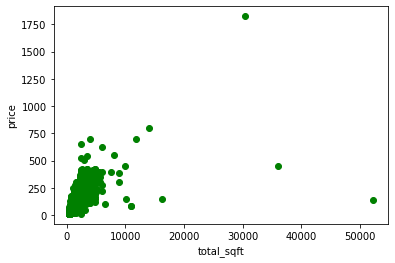

In [ ]:
plt.scatter(df7['sqft_area'],df7['price(inlakhs)'],c='g')
plt.xlabel('total_sqft')
plt.ylabel('price')
plt.show()